# Dimensionality Reduction (DM)
I chose this topic because of my interest in studying and predicting the physical properties of nanomaterials and nanostructures. The datasets for these models are vast, as there are numerous physical and chemical properties for two-dimensional materials, such as structural parameters, chemical bonding, band gap, formation energy, bulk modulus, Fermi energy, thermal conductivity, chemical formula, isospin charge, and total magnetization. Therefore, this technique is crucial for reducing model features. 
## What is the DR?
Dimensionality reduction is a technique used to reduce the number of dimensions in a dataset for better graphical representation and understanding of the model. This allows for a reduction in the number of features in a large dataset, ultimately reducing the complexity of the model. If our model depends on *n* features, the reduction dimensionality allows mapping the high-dimensional space into a low-dimensional space while preserving the most important features. The are various technioques for this, the principal are feature selection and feature extraction.
### Feature selection
"Feature selection involves selecting a subset of the original features that are most relevant to the problem at hand. The goal is to reduce the dimensionality of the dataset while retaining the most important features." 

### Feature extraction
"Feature extraction involves creating new features by combining or transforming the original features. The goal is to create a set of features that captures the essence of the original data in a lower-dimensional space. There are several methods for feature extraction, including principal component analysis (PCA), linear discriminant analysis (LDA)..."

In this notebook, I chose to use the PCA method for feature extraction. This technique reduces the data from a high-dimensional space to a lower-dimensional space, resulting in a space with fewer dimensions.

#### Principal component analysis (PCA)
This method was introduced by Karl Pearson. It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum.

0. **Steps**:
    1. Construct the covariance matrix of the data.
    2. Compute the eigenvectors of this matrix.
    3. Eigenvectors corresponding to the largest eigenvalues are used to reconstruct a large fraction of variance of the original data.
    
PCA ensures that maximum information of the original dataset is retained in the dataset with the reduced no. of dimensions and the co-relation between the newly obtained Principal Components is minimum. The new features obtained after applying PCA are called Principal Components and are denoted as PCi (i=1,2,3, …, n). Here, (Principal Component-1) PC1 captures the maximum information of the original dataset, followed by PC2, then PC3 and so on. 
    
#### Advantages of Dimensionality Reduction
0. It helps in data compression, and hence reduced storage space.
1. It reduces computation time.
2. It also helps remove redundant features.
3. Improved Visualization.
4. Feature Extraction.
5. Can be used as a preprocessing step before applying machine learning algorithms to reduce the dimensionality of the data and hence improve the performance of the model.
6. Can help in improving the performance of machine learning models by reducing the complexity of the data.

#### Disadvantages of Dimensionality Reduction
0. It may lead to some amount of data loss.
1. PCA tends to find linear correlations between variables, which is sometimes undesirable.
2. PCA fails in cases where mean and covariance are not enough to define datasets.
3. Some dimensionality reduction techniques, such as manifold learning, can be computationally intensive, especially when dealing with large datasets.

#### The data set
The dataset utilized is matminer, a Python library for mining materials properties. Matminer lacks machine learning routines but is compatible with the pandas format to provide access to various downstream machine learning tools and libraries for materials science applications. The datasets module offers an expanding collection of materials science datasets that are gathered, formatted as pandas dataframes, and presented in a unified interface. 
**boltztrap_mp**
Effective mass and thermoelectric properties of 8924 compounds in The Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

**Features:**
1. m_n = n-type/conduction band effective mass. Units: m_e where m_e is the mass of an electron; i.e. m_n is a unitless ratio
2. m_p= p-type/valence band effective mass.
3. pf_n= n-type thermoelectric power factor in uW/cm2.K where uW is microwatts and a constant relaxation time of 1e-14 assumed.
4. pf_p= p-type power factor in uW/cm2.K
5. s_n= n-type Seebeck coefficient in micro Volts per Kelvin
6. s_p= p-type Seebeck coefficient in micro Volts per Kelvin

###### References 
1. Introduction to Dimensionality Reduction (https://www.geeksforgeeks.org/dimensionality-reduction/).
2. Reduce Data Dimensionality using PCA – Python (https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/).
3. Ricci, F. et al. An ab initio electronic transport database for inorganic materials. Sci. Data 4:170085 doi: 10.1038/sdata.2017.85 (2017). Ricci F, Chen W, Aydemir U, Snyder J, Rignanese G, Jain A, Hautier G (2017) Data from: An ab initio electronic transport database for inorganic materials. Dryad Digital Repositor https://hackingmaterials.lbl.gov/matminer/#examples

In [11]:
# Import libraries
from sklearn import datasets # to retrieve 
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps


In [4]:
#Download de dataset from matminer
from matminer.datasets import load_dataset #import library
df = load_dataset('boltztrap_mp') #Create a dataframe
df.head() #show only some columns

,mpid,pf_n,pf_p,s_n,s_p,formula,m_n,m_p,structure
0,mp-10070,0.865,0.0125,-421.0,760.0,BaAg(PO3)3,0.578,72.800,"[[ 0.08245398 10.58009491 11.61923254] O, [3.1..."
1,mp-10086,1.050,0.6440,-393.0,567.0,YSF,0.541,4.020,"[[2.84699546 0.94899849 0. ] F, [0.9489..."
2,mp-10096,0.977,0.4200,-305.0,471.0,Na3Sr3GaP4,0.270,1.020,"[[-2.8085287 7.06608376 1.25800196] Na, [1...."
3,mp-10103,0.889,0.0257,-416.0,871.0,YbLiAlF6,0.548,20.300,"[[2.52287112 1.45658029 7.18290524] Li, [-2.85..."
4,mp-10155,0.719,1.5700,-496.0,510.0,P2Ir,1.160,0.667,"[[0.86371064 5.14343422 4.80450637] P, [4.5512..."


In [9]:
df1=df.iloc[:, [1,2,3,4,6,7]] #Selecting only a few columns
df1.head()

,pf_n,pf_p,s_n,s_p,m_n,m_p
0,0.865,0.0125,-421.0,760.0,0.578,72.800
1,1.050,0.6440,-393.0,567.0,0.541,4.020
2,0.977,0.4200,-305.0,471.0,0.270,1.020
3,0.889,0.0257,-416.0,871.0,0.548,20.300
4,0.719,1.5700,-496.0,510.0,1.160,0.667


Standard Scalar is already present in sklearn. So, now we will standardize the feature set using Standard Scalar and store the scaled feature set as a pandas data frame.

In [13]:
#Standardize the feautures
scalar = StandardScaler() 
scaled_data=pd.DataFrame(scalar.fit_transform(df1))
scaled_data.head()

,0,1,2,3,4,5
0,0.425702,-0.658891,0.758867,0.587075,-0.018616,-0.016310
1,0.821989,0.793362,0.929975,-0.763501,-0.018616,-0.016365
2,0.665617,0.278232,1.467742,-1.435290,-0.018617,-0.016368
3,0.477113,-0.628535,0.789422,1.363831,-0.018616,-0.016352
4,0.112957,2.922873,0.300542,-1.162375,-0.018616,-0.016368


<AxesSubplot:>

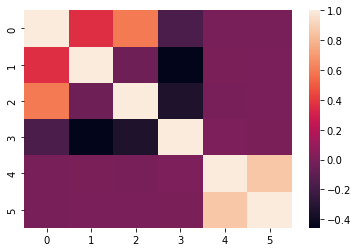

In [11]:
#Check the correlation between features
sns.heatmap(scaled_data.corr()) #We see there are a strong correlation between features in the dataframe

In [14]:
#Applying PCA
#Number of principal components
pca=PCA(n_components=3)
pca.fit(scaled_data) #finds a line that best fits a collection of dataset
data_pca=pca.transform(scaled_data) #Applying PCA transform
data_pca=pd.DataFrame(data_pca,
                     columns=['PC1','PC2','PC3']) #Transform PCA in a dataframe


In [15]:
data_pca

,PC1,PC2,PC3
0,-0.065867,-0.028224,-1.220822
1,-1.617871,0.323635,0.024056
2,-1.906991,0.382380,-0.328624
3,0.249186,-0.100778,-1.524736
4,-1.983518,0.433119,2.153735
...,...,...,...
8919,-2.328691,0.483602,0.575900
8920,-1.467275,0.296953,0.499867
8921,-1.575855,0.297418,-1.271411
8922,-1.601832,0.320850,0.364423


<AxesSubplot:>

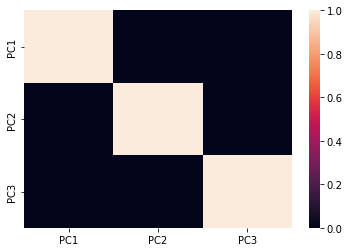

In [16]:
#Checking again the correlation between the features after PCA transforming
sns.heatmap(data_pca.corr())


The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.